In [ ]:
import seaborn as sns
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
btc = yf.Ticker('BTC-USD')
prices1 = btc.history(period='5y')
prices1.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

eth = yf.Ticker('ETH-USD')
prices2 = eth.history(period='5y')
prices2.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

usdt = yf.Ticker('USDT-USD')
prices3 = usdt.history(period='5y')
prices3.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

bnb = yf.Ticker('BNB-USD')
prices4 = bnb.history(period='5y')
prices4.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

In [ ]:

p1 = prices1.join(prices2, lsuffix = ' (BTC)', rsuffix = ' (ETH)')
p2 = prices3.join(prices4, lsuffix = ' (USDT)', rsuffix = ' (BNB)')
data = p1.join(p2, lsuffix = '_', rsuffix = '_')

In [ ]:
data.head()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,,
2020-03-03 00:00:00+00:00,8787.786133,42386715821,224.479630,19853178572,1.002497,50681960308,19.637190,355662760
2020-03-04 00:00:00+00:00,8755.246094,34746706368,224.517975,16567075208,1.000622,48605279710,19.959188,363898093
2020-03-05 00:00:00+00:00,9078.762695,39698054597,229.268188,18201291785,1.002522,49920180590,20.802031,424802925
2020-03-06 00:00:00+00:00,9122.545898,40826885651,243.525299,19374772256,0.998430,49389801062,21.288389,449180749
2020-03-07 00:00:00+00:00,8909.954102,36216930370,237.853088,19431652027,1.000182,46199415513,20.179567,337204407


In [ ]:
data.tail()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,,
2025-02-27 00:00:00+00:00,84704.226562,52659591954,2305.484375,24286213447,0.998980,98043035762,605.123657,1866447677
2025-02-28 00:00:00+00:00,84373.007812,83610570576,2237.905273,35737904667,0.999529,146908454227,587.451599,2166029990
2025-03-01 00:00:00+00:00,86031.914062,29190628396,2216.643311,16135258239,0.999449,62938723492,607.511536,1694454521
2025-03-02 00:00:00+00:00,94248.351562,58398341092,2519.694580,34854193845,1.000125,133280929229,622.936096,2130538305
2025-03-03 00:00:00+00:00,90047.445312,75075051520,2280.411133,34392772608,0.999389,150146646016,592.468567,2282482688


In [ ]:
data.shape

(1827, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1827 entries, 2020-03-03 00:00:00+00:00 to 2025-03-03 00:00:00+00:00
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Close (BTC)    1827 non-null   float64
 1   Volume (BTC)   1827 non-null   int64  
 2   Close (ETH)    1827 non-null   float64
 3   Volume (ETH)   1827 non-null   int64  
 4   Close (USDT)   1827 non-null   float64
 5   Volume (USDT)  1827 non-null   int64  
 6   Close (BNB)    1827 non-null   float64
 7   Volume (BNB)   1827 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 128.5 KB


In [ ]:
data.isna().sum()

Close (BTC)      0
Volume (BTC)     0
Close (ETH)      0
Volume (ETH)     0
Close (USDT)     0
Volume (USDT)    0
Close (BNB)      0
Volume (BNB)     0
dtype: int64

In [ ]:
data.describe()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
count,1827.000000,1.827000e+03,1827.000000,1.827000e+03,1827.000000,1.827000e+03,1827.000000,1.827000e+03
mean,39317.610817,3.372295e+10,2076.864689,1.708848e+10,1.000362,6.140752e+10,328.551602,1.482841e+09
std,23219.348736,2.019706e+10,1112.849427,1.090102e+10,0.002076,4.000412e+10,198.846966,1.389207e+09
min,4970.788086,5.331173e+09,110.605873,2.081626e+09,0.974248,9.989859e+09,9.386050,1.365992e+08
25%,21117.011719,2.059054e+10,1338.023315,9.649943e+09,0.999917,3.588380e+10,228.449203,4.923471e+08
50%,35547.750000,3.004923e+10,1931.466553,1.487926e+10,1.000179,5.211196e+10,308.101776,1.219178e+09
75%,56074.228516,4.080792e+10,2971.746216,2.110870e+10,1.000544,7.397050e+10,501.544846,1.942387e+09
max,106146.265625,3.509679e+11,4812.087402,9.245355e+10,1.053585,3.006686e+11,750.272644,1.798295e+10


# Exploratory Data Analysis

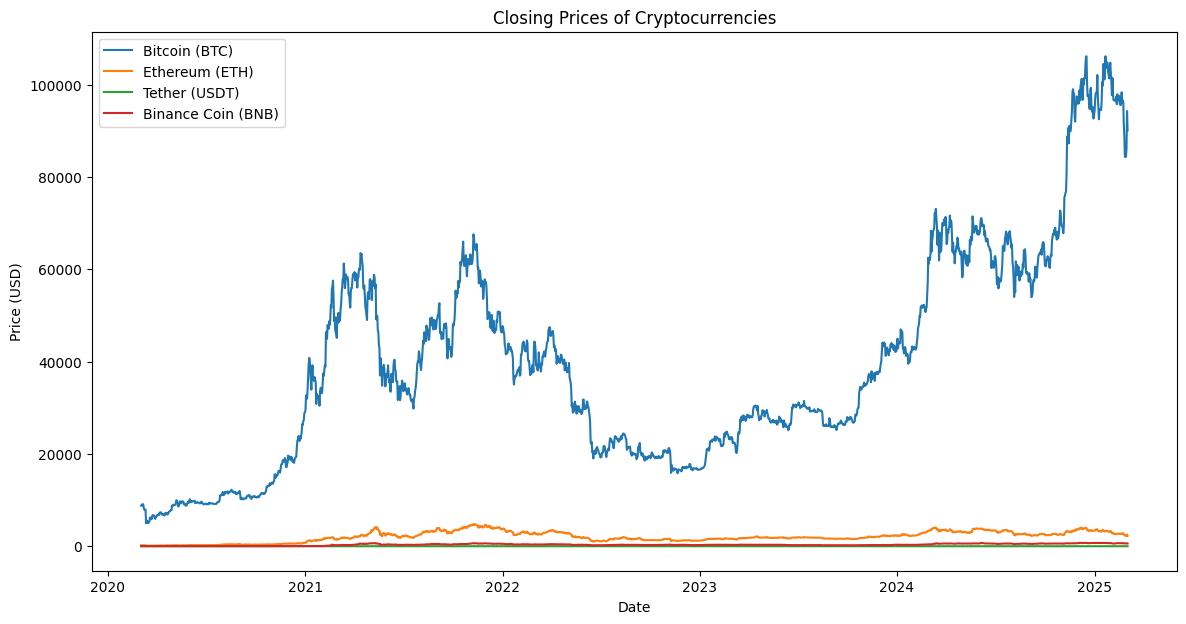

In [ ]:
#Visualize the Closing Prices
# create a line plot to visualize the closing prices of all four cryptocurrencies over time:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close (BTC)'], label='Bitcoin (BTC)')
plt.plot(data.index, data['Close (ETH)'], label='Ethereum (ETH)')
plt.plot(data.index, data['Close (USDT)'], label='Tether (USDT)')
plt.plot(data.index, data['Close (BNB)'], label='Binance Coin (BNB)')
plt.title('Closing Prices of Cryptocurrencies')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

<Axes: xlabel='Date'>

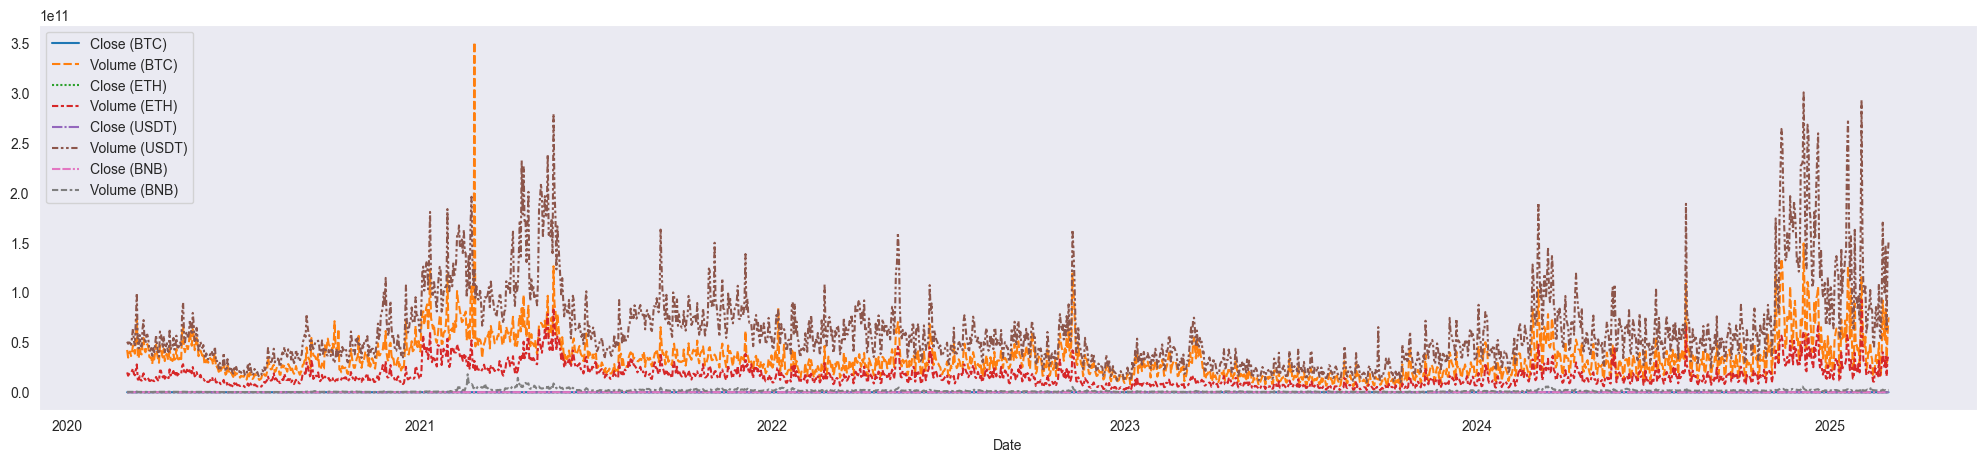

In [ ]:
plt.figure(figsize = (25, 5))
sns.set_style('dark')
sns.lineplot(data=data)

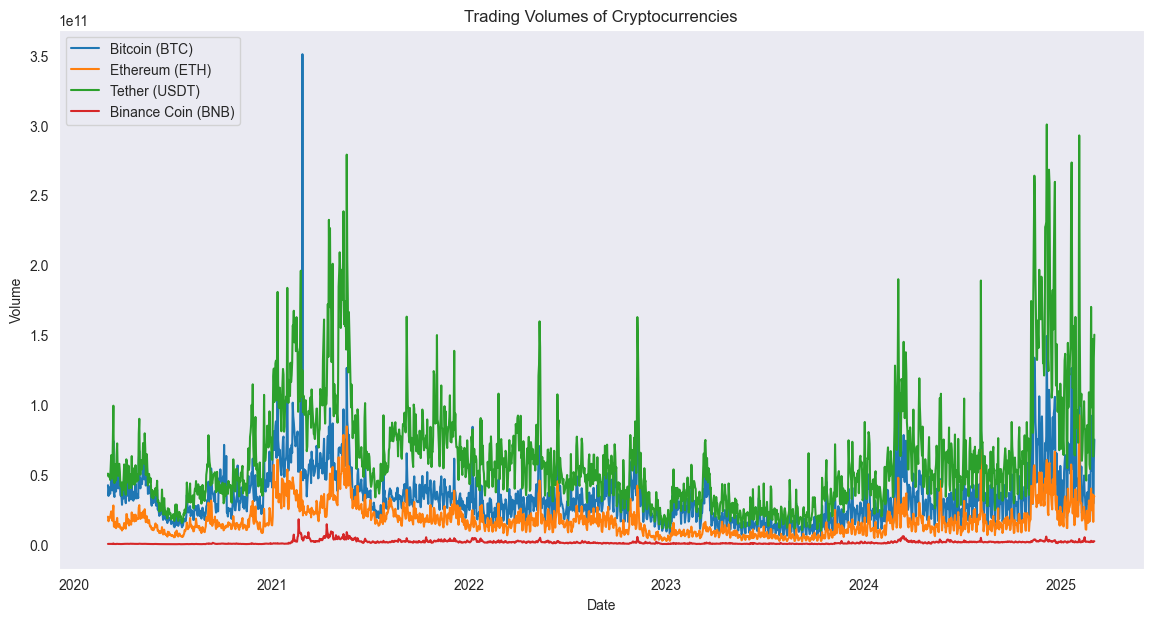

In [ ]:
# Visualize the Trading Volumes
#Let's visualize the trading volumes of all four cryptocurrencies:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Volume (BTC)'], label='Bitcoin (BTC)')
plt.plot(data.index, data['Volume (ETH)'], label='Ethereum (ETH)')
plt.plot(data.index, data['Volume (USDT)'], label='Tether (USDT)')
plt.plot(data.index, data['Volume (BNB)'], label='Binance Coin (BNB)')
plt.title('Trading Volumes of Cryptocurrencies')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

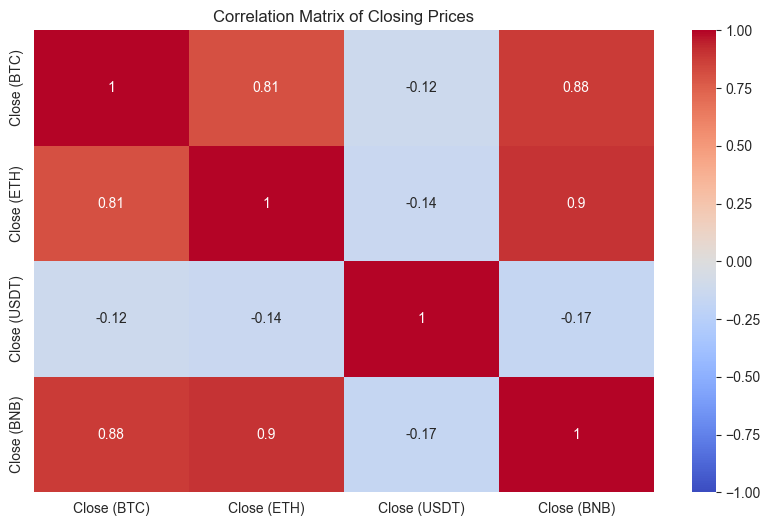

In [ ]:
 #Correlation Analysis
#We'll analyze the correlation between the closing prices of the cryptocurrencies:
# Calculate the correlation matrix
corr_matrix = data[['Close (BTC)', 'Close (ETH)', 'Close (USDT)', 'Close (BNB)']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Closing Prices')
plt.show()


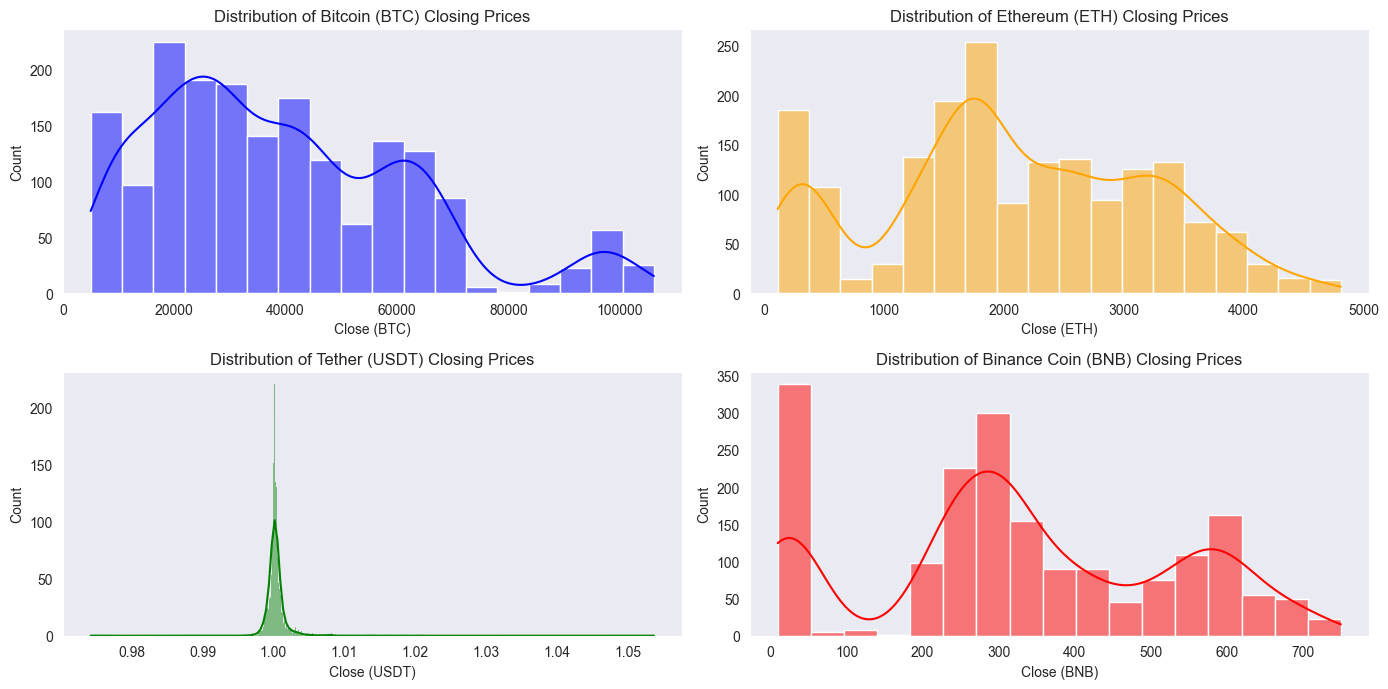

In [ ]:
# Distribution of Closing Prices
#Let's plot the distribution of closing prices for each cryptocurrency:
plt.figure(figsize=(14, 7))

plt.subplot(2, 2, 1)
sns.histplot(data['Close (BTC)'], kde=True, color='blue')
plt.title('Distribution of Bitcoin (BTC) Closing Prices')

plt.subplot(2, 2, 2)
sns.histplot(data['Close (ETH)'], kde=True, color='orange')
plt.title('Distribution of Ethereum (ETH) Closing Prices')

plt.subplot(2, 2, 3)
sns.histplot(data['Close (USDT)'], kde=True, color='green')
plt.title('Distribution of Tether (USDT) Closing Prices')

plt.subplot(2, 2, 4)
sns.histplot(data['Close (BNB)'], kde=True, color='red')
plt.title('Distribution of Binance Coin (BNB) Closing Prices')

plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'Close (BTC)'}>,
        <Axes: title={'center': 'Volume (BTC)'}>,
        <Axes: title={'center': 'Close (ETH)'}>,
        <Axes: title={'center': 'Volume (ETH)'}>],
       [<Axes: title={'center': 'Close (USDT)'}>,
        <Axes: title={'center': 'Volume (USDT)'}>,
        <Axes: title={'center': 'Close (BNB)'}>,
        <Axes: title={'center': 'Volume (BNB)'}>]], dtype=object)

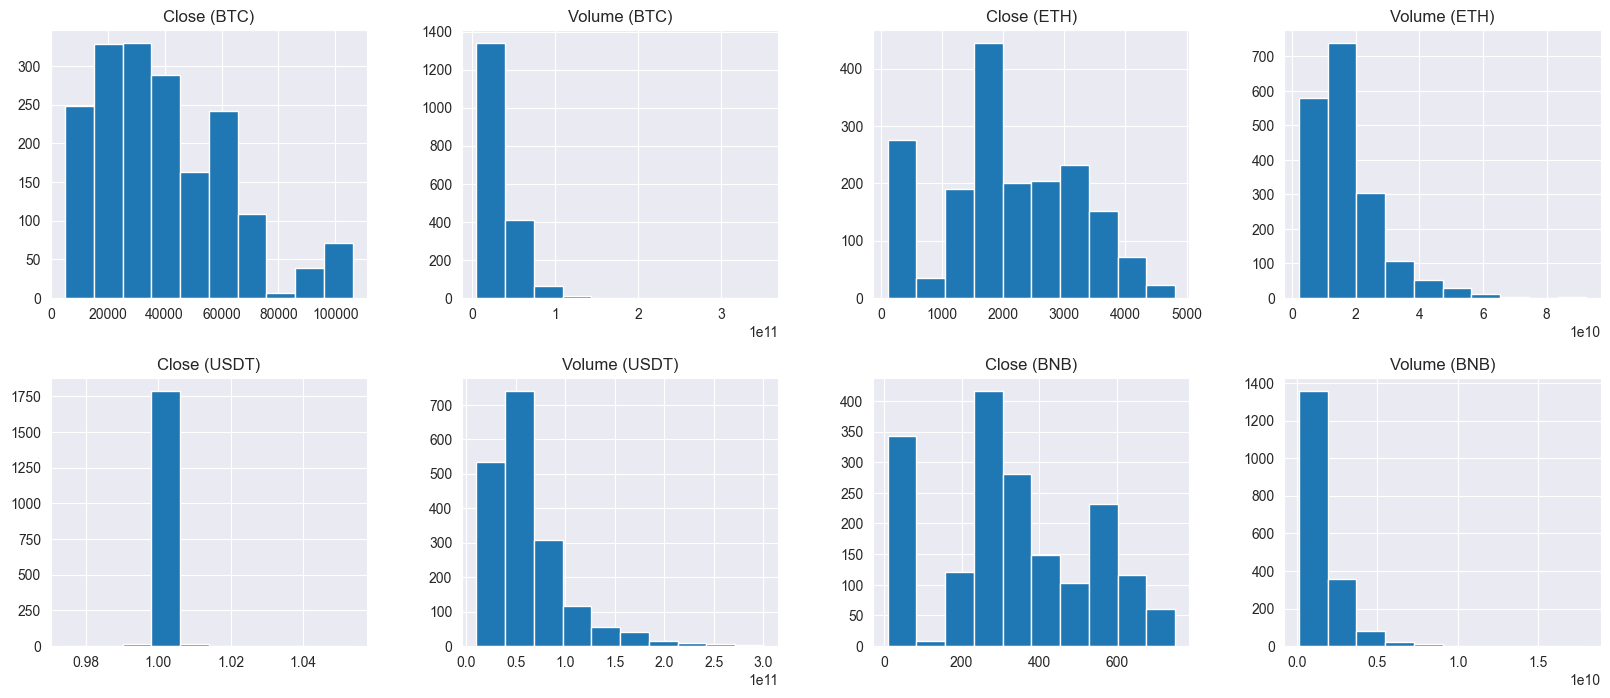

In [ ]:
data.hist(figsize=(20, 8), layout=(2, 4))

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

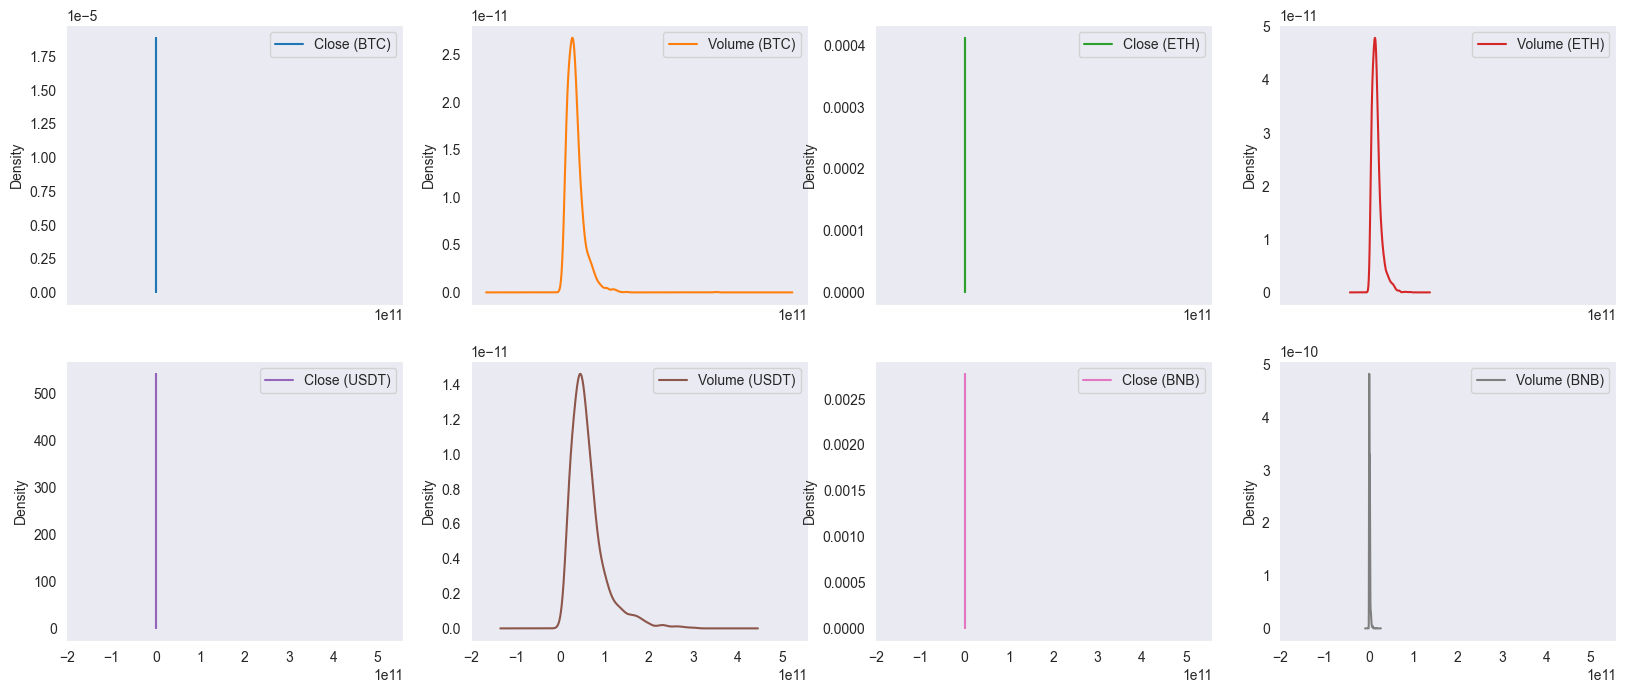

In [ ]:
data.plot(kind = "kde", subplots = True, layout = (2, 4), figsize = (20, 8))

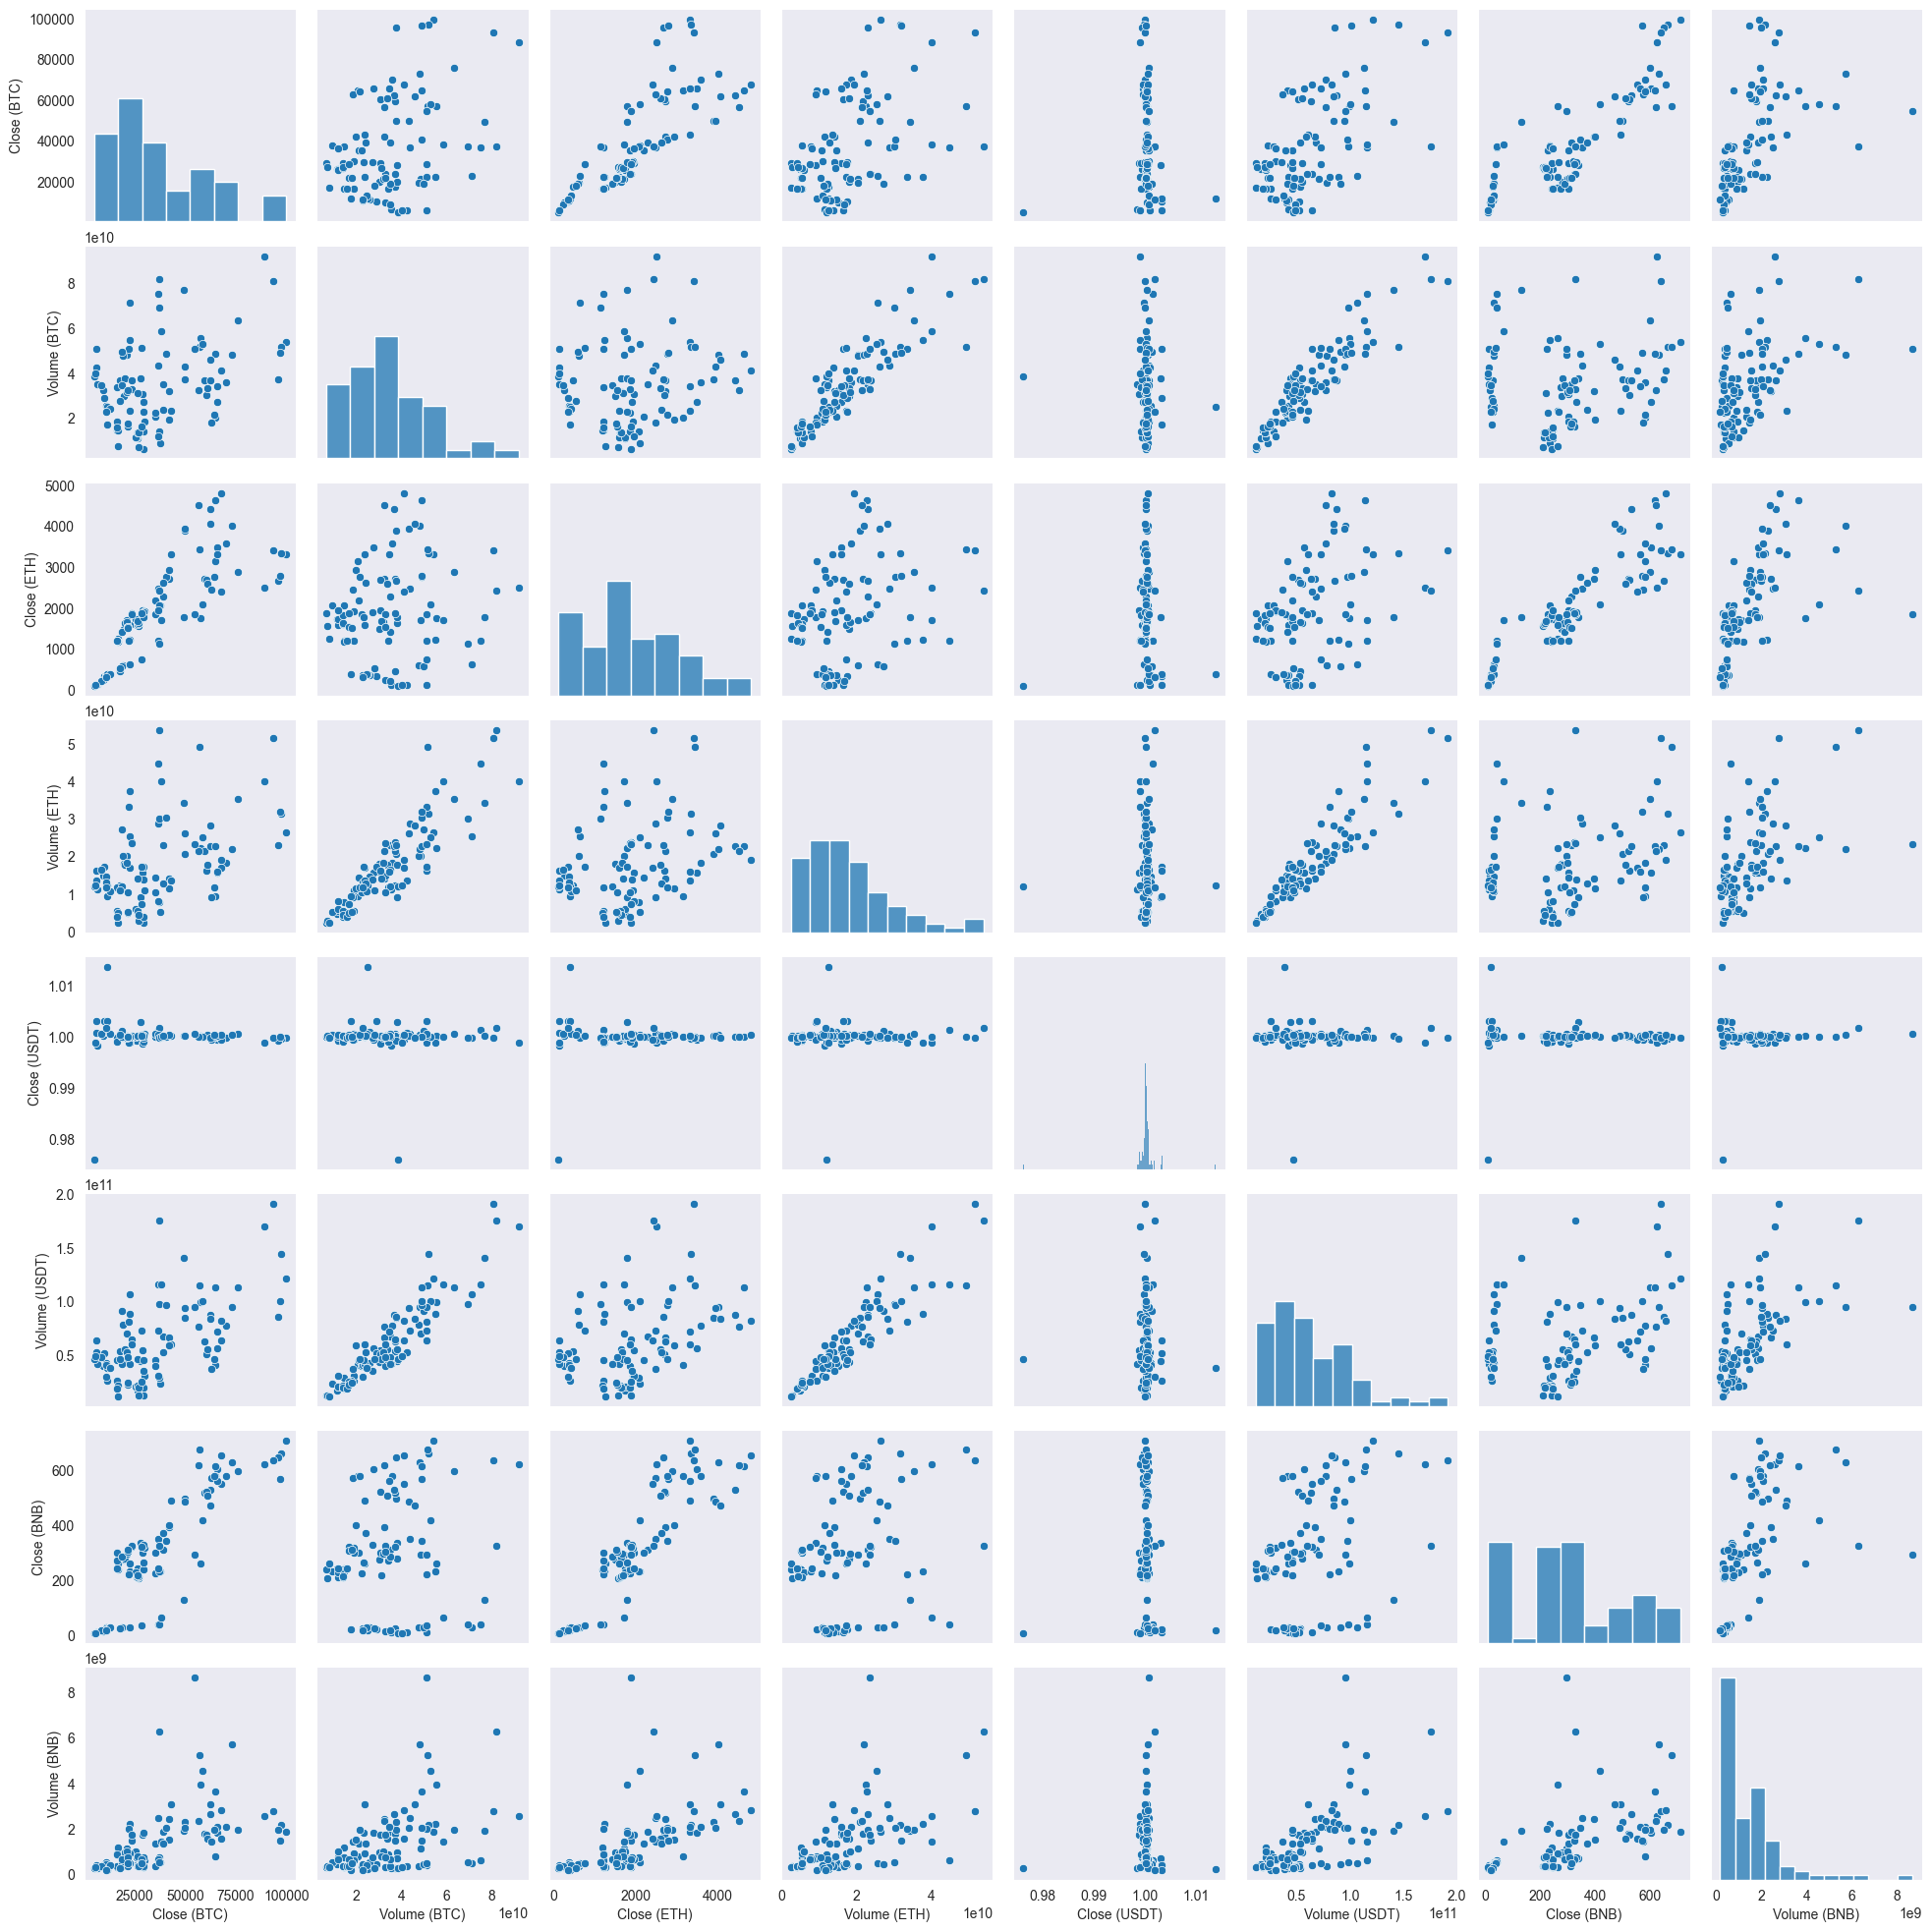

In [ ]:
sns.pairplot(data.sample(n=100));

#Data Preprocessing

In [ ]:
X = data.drop(columns = ['Close (BTC)'], axis = 1)
Y = data.loc[:, 'Close (BTC)']

In [ ]:
X.head()

,Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,
2020-03-03 00:00:00+00:00,42386715821,224.479630,19853178572,1.002497,50681960308,19.637190,355662760
2020-03-04 00:00:00+00:00,34746706368,224.517975,16567075208,1.000622,48605279710,19.959188,363898093
2020-03-05 00:00:00+00:00,39698054597,229.268188,18201291785,1.002522,49920180590,20.802031,424802925
2020-03-06 00:00:00+00:00,40826885651,243.525299,19374772256,0.998430,49389801062,21.288389,449180749
2020-03-07 00:00:00+00:00,36216930370,237.853088,19431652027,1.000182,46199415513,20.179567,337204407


In [ ]:
X.tail()

,Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,
2025-02-27 00:00:00+00:00,52659591954,2305.484375,24286213447,0.998980,98043035762,605.123657,1866447677
2025-02-28 00:00:00+00:00,83610570576,2237.905273,35737904667,0.999529,146908454227,587.451599,2166029990
2025-03-01 00:00:00+00:00,29190628396,2216.643311,16135258239,0.999449,62938723492,607.511536,1694454521
2025-03-02 00:00:00+00:00,58398341092,2519.694580,34854193845,1.000125,133280929229,622.936096,2130538305
2025-03-03 00:00:00+00:00,75075051520,2280.411133,34392772608,0.999389,150146646016,592.468567,2282482688


In [ ]:
Y.head()

Date
2020-03-03 00:00:00+00:00    8787.786133
2020-03-04 00:00:00+00:00    8755.246094
2020-03-05 00:00:00+00:00    9078.762695
2020-03-06 00:00:00+00:00    9122.545898
2020-03-07 00:00:00+00:00    8909.954102
Name: Close (BTC), dtype: float64

In [ ]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
# Print the shapes of the resulting datasets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {Y_train.shape}')
print(f'y_test shape: {Y_test.shape}')

X_train shape: (1461, 7)
X_test shape: (366, 7)
y_train shape: (1461,)
y_test shape: (366,)


In [ ]:
#SelectKBest
#SelectKBest is a feature selection method provided by scikit-learn (sklearn) that selects the top k features based on a specified scoring function.
#This function evaluates each feature independently and selects those that have the strongest relationship with the target variable.

#Parameters
#k: Specifies the number of top features to select. In your case, k=4 indicates that you want to select the top 4 features

from sklearn.feature_selection import SelectKBest

fs = SelectKBest(k=4)
X_train = fs.fit_transform(X_train, Y_train)
X_test = fs.transform(X_test)

C:\Users\siddu\AppData\Roaming\Python\Python311\site-packages\sklearn\feature_selection\_univariate_selection.py:108: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


In [ ]:
mask = fs.get_support()
selected_features = X.columns[mask]
print("Selected Features:", selected_features) 

Selected Features: Index(['Close (USDT)', 'Volume (USDT)', 'Close (BNB)', 'Volume (BNB)'], dtype='object')


In [ ]:
X_train


array([[1.00100100e+00, 5.96222196e+10, 2.91439114e+01, 3.38275296e+08],
       [1.00104702e+00, 4.23551984e+10, 2.99948997e+01, 5.46849696e+08],
       [1.00044298e+00, 8.25485107e+10, 6.54315002e+02, 2.82811253e+09],
       ...,
       [1.00013697e+00, 5.39103554e+10, 5.30194031e+02, 1.62970328e+09],
       [1.00023496e+00, 9.76529415e+10, 3.99063446e+02, 2.19476376e+09],
       [1.00041699e+00, 4.15513821e+10, 4.98427917e+02, 1.77192795e+09]])

In [ ]:
#MinMaxScaler is a preprocessing method in scikit-learn that transforms features by scaling them to a specified range.
# It's often used when your data needs to be normalized within a specific range to ensure all features contribute equally to the analysis.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# implementation of 10 different regression algorithms using scikit-learn. Each algorithm is trained and evaluated on a sample dataset:

#Import Libraries and Generate Sample Data

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

----- Linear Regression -----
Mean Squared Error (MSE): 93730043.8021823
R-squared: 0.8377732339111719

----- Ridge Regression -----
Mean Squared Error (MSE): 94228932.50796671
R-squared: 0.8369097636929306

----- Lasso Regression -----
Mean Squared Error (MSE): 93743311.7488777
R-squared: 0.837750269918009

----- ElasticNet Regression -----
Mean Squared Error (MSE): 461155914.47857994
R-squared: 0.20183721639470364

----- Support Vector Regression (SVR) -----
Mean Squared Error (MSE): 572415532.1571189
R-squared: 0.009270487093244073

----- Decision Tree Regression -----
Mean Squared Error (MSE): 82349675.66716383
R-squared: 0.8574702301415461

----- Random Forest Regression -----
Mean Squared Error (MSE): 41303839.106812604
R-squared: 0.9285118413099955

----- Gradient Boosting Regression -----
Mean Squared Error (MSE): 44412095.06691155
R-squared: 0.9231321114802796

----- K-Nearest Neighbors Regression -----
Mean Squared Error (MSE): 51035496.164997205
R-squared: 0.9116684132138054

C:\Users\siddu\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


----- Neural Network Regression (MLP) -----
Mean Squared Error (MSE): 306152137.07264274
R-squared: 0.4701157802369226

                             Model           MSE  R-squared
0                Linear Regression  9.373004e+07   0.837773
1                 Ridge Regression  9.422893e+07   0.836910
2                 Lasso Regression  9.374331e+07   0.837750
3            ElasticNet Regression  4.611559e+08   0.201837
4  Support Vector Regression (SVR)  5.724155e+08   0.009270
5         Decision Tree Regression  8.234968e+07   0.857470
6         Random Forest Regression  4.130384e+07   0.928512
7     Gradient Boosting Regression  4.441210e+07   0.923132
8   K-Nearest Neighbors Regression  5.103550e+07   0.911668
9  Neural Network Regression (MLP)  3.061521e+08   0.470116


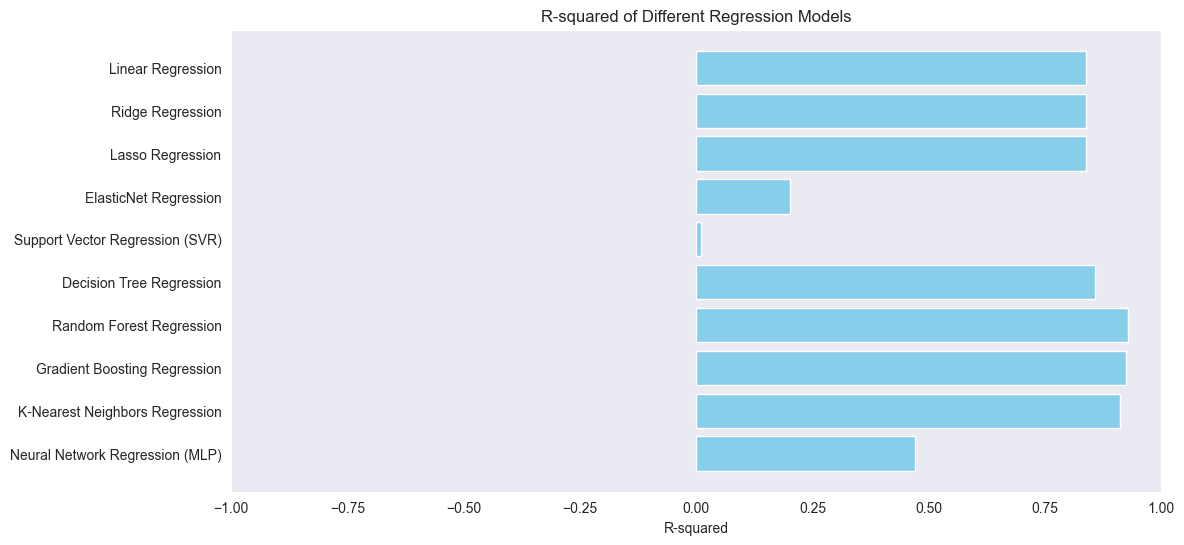

In [ ]:

#Define Models and Perform Training and Evaluation
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'ElasticNet Regression': ElasticNet(alpha=1.0, l1_ratio=0.5),
    'Support Vector Regression (SVR)': SVR(kernel='rbf'),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(n_estimators=100),
    'Gradient Boosting Regression': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1),
    'K-Nearest Neighbors Regression': KNeighborsRegressor(n_neighbors=5),
    'Neural Network Regression (MLP)': MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam')
}

# Train and evaluate each model
results = {'Model': [], 'MSE': [], 'R-squared': []}

for name, model in models.items():
    # Train the model
    model.fit(X_train, Y_train)

    # Predict on test set
    Y_pred = model.predict(X_test)

    # Evaluate model
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)

    # Store results
    results['Model'].append(name)
    results['MSE'].append(mse)
    results['R-squared'].append(r2)

    # Print results
    print(f"----- {name} -----")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared: {r2}")
    print()

# Convert results to DataFrame for visualization
results_df = pd.DataFrame(results)
print(results_df)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.barh(results_df['Model'], results_df['R-squared'], color='skyblue')
plt.xlabel('R-squared')
plt.title('R-squared of Different Regression Models')
plt.xlim(-1, 1)
plt.gca().invert_yaxis()
plt.show()

#Random Forest Regression is a powerful and versatile algorithm suitable for various regression tasks, offering robust performance and the ability to handle complex data relationships

#Saving the Model

In [ ]:
import pickle
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

# Generate sample data
X, Y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=0)


# Scale the features (optional but recommended for some algorithms)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=0)

# Train the model
model_rf.fit(X_train, Y_train)

# Save the model to a file
filename = 'random_forest_model.pkl'
pickle.dump(model_rf, open(filename, 'wb'))

# Save scaler to a file
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Load the model from the file
loaded_model = pickle.load(open(filename, 'rb'))

# Predict using the loaded model
Y_pred = loaded_model.predict(X_test)

# Evaluate the loaded model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Loaded Random Forest Regression - Mean Squared Error (MSE): {mse}")
print(f"Loaded Random Forest Regression - R-squared: {r2}")


Loaded Random Forest Regression - Mean Squared Error (MSE): 42273776.47859339
Loaded Random Forest Regression - R-squared: 0.9268330860598136
